In [1]:
import yfinance as yf
import pandas as pd

In [2]:
df=yf.download('AAPL',start='2020-01-01',end='2024-05-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960457,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484352,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200
...,...,...,...,...,...,...
2024-04-24,166.539993,169.300003,166.210007,169.020004,168.791061,48251800
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.659882,50558300
2024-04-26,169.880005,171.339996,169.179993,169.300003,169.070679,44838400


In [4]:
df['ret_20']= df.Close.pct_change(20)
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,ret_20
Date,,,,,,,
2020-01-31,80.232498,80.669998,77.072502,77.377502,75.185593,199588400,0.030498
2020-02-03,76.074997,78.372498,75.555000,77.165001,74.979103,173788400,0.037757
2020-02-04,78.827499,79.910004,78.407501,79.712502,77.454460,136616400,0.063542
2020-02-05,80.879997,81.190002,79.737503,80.362503,78.086052,118826800,0.077281
2020-02-06,80.642502,81.305000,80.065002,81.302498,78.999405,105425600,0.072628
...,...,...,...,...,...,...,...
2024-04-24,166.539993,169.300003,166.210007,169.020004,168.791061,48251800,-0.004066
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.659882,50558300,-0.019733
2024-04-26,169.880005,171.339996,169.179993,169.300003,169.070679,44838400,-0.012713


In [6]:
df['signal']=df.ret_20 > 0.05
df.dropna(inplace=True)

In [7]:
df

,Open,High,Low,Close,Adj Close,Volume,ret_20,signal
Date,,,,,,,,
2020-01-31,80.232498,80.669998,77.072502,77.377502,75.185593,199588400,0.030498,False
2020-02-03,76.074997,78.372498,75.555000,77.165001,74.979103,173788400,0.037757,False
2020-02-04,78.827499,79.910004,78.407501,79.712502,77.454460,136616400,0.063542,True
2020-02-05,80.879997,81.190002,79.737503,80.362503,78.086052,118826800,0.077281,True
2020-02-06,80.642502,81.305000,80.065002,81.302498,78.999405,105425600,0.072628,True
...,...,...,...,...,...,...,...,...
2024-04-24,166.539993,169.300003,166.210007,169.020004,168.791061,48251800,-0.004066,False
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.659882,50558300,-0.019733,False
2024-04-26,169.880005,171.339996,169.179993,169.300003,169.070679,44838400,-0.012713,False


In [10]:
df['buyprice']=df.Open.shift(-1)
df.head(8) #buy signal when return is above 5%

,Open,High,Low,Close,Adj Close,Volume,ret_20,signal,buyprice
Date,,,,,,,,,
2020-01-31,80.232498,80.669998,77.072502,77.377502,75.185593,199588400,0.030498,False,76.074997
2020-02-03,76.074997,78.372498,75.555000,77.165001,74.979103,173788400,0.037757,False,78.827499
2020-02-04,78.827499,79.910004,78.407501,79.712502,77.454460,136616400,0.063542,True,80.879997
2020-02-05,80.879997,81.190002,79.737503,80.362503,78.086052,118826800,0.077281,True,80.642502
2020-02-06,80.642502,81.305000,80.065002,81.302498,78.999405,105425600,0.072628,True,80.592499
2020-02-07,80.592499,80.849998,79.500000,80.007500,77.925598,117684000,0.033588,False,78.544998
2020-02-10,78.544998,80.387497,78.462502,80.387497,78.295708,109348800,0.036155,False,80.900002
2020-02-11,80.900002,80.974998,79.677498,79.902496,77.823311,94323200,0.008361,False,80.367500


In [13]:
79.902496/80.879997-1  #sell/buy -1 after buying we hold it for  days

-0.012085818944825188

In [14]:
#we need to loop now

In [16]:
df.loc['2020-01-01':][0:1] #buyprice.values[0]

,Open,High,Low,Close,Adj Close,Volume,ret_20,signal,buyprice
Date,,,,,,,,,
2020-01-31,80.232498,80.669998,77.072502,77.377502,75.185593,199588400,0.030498,False,76.074997


In [26]:
profits=[]
in_position=False
sellidx=pd.to_datetime('1900-01-01')

for index,row in df.iterrows():
    if not in_position and row.signal and index > sellidx:
        buyprice=df.loc[index:][0:1].buyprice.values[0]
        in_position =True
    if in_position:
        sellprice=df.loc[index:][5:6].Close.values[0]
        sellidx=df.loc[index:][5:6].index
        profit=(sellprice-buyprice)/buyprice
        profits.append(profit)
        in_position=False

In [27]:
profits

[-0.01208581786253751,
 0.054004660155127705,
 0.024938521351093205,
 0.0450601836027804,
 0.014609830017634011,
 0.0549359069908368,
 -0.0051004448113891035,
 0.059539168219758146,
 0.006527150082254444,
 0.028761508200264973,
 0.05831565775942144,
 0.0305532218314095,
 0.007352741327872168,
 0.15439637213771887,
 -2.287894082780472e-05,
 0.01116399837877867,
 0.04819205814953377,
 -0.05188903160033216,
 -0.06837822628114687,
 -0.07415976319216264,
 -0.0005999802513312368,
 0.022642738743900694,
 0.026901136328269452,
 0.015981481108813284,
 -0.034181667611681316,
 0.008456011750175442,
 0.046406666084157354,
 -0.07765429539102899,
 -0.016163095173290287,
 -0.07004210722866099,
 0.0683461076021704,
 -0.0023913264587068594,
 0.009987833148101923,
 -0.013859335544648313,
 0.0206563905558712,
 0.049096790884941115,
 0.014630111479310648,
 -0.025730443951609068,
 -0.012944789038326085,
 -0.0015031512693746533,
 -0.0034612862175336825,
 0.02639852405753041,
 -0.041546121844797244,
 0.00441

<Axes: >

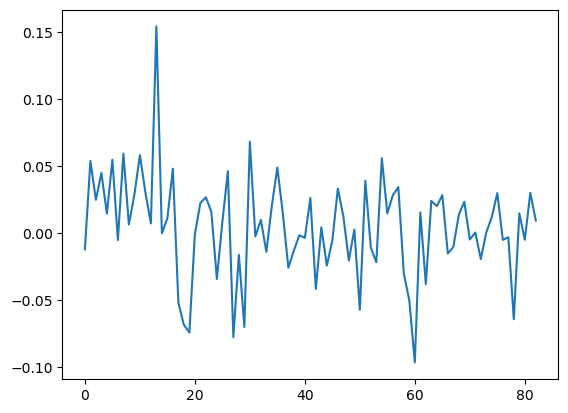

In [28]:
pd.Series(profits).plot()

<Axes: >

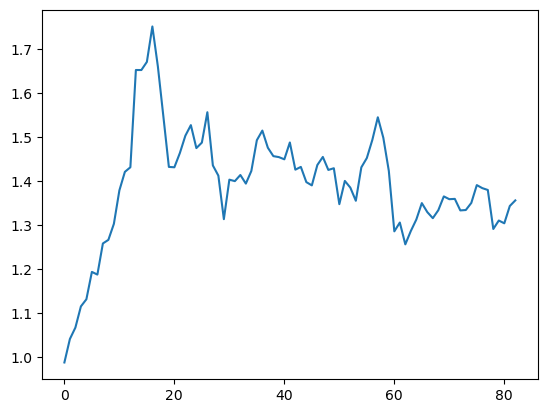

In [29]:
(pd.Series(profits)+1).cumprod().plot()

In [31]:
(pd.Series(profits)+1).prod() -1 #almost 36% profit

0.3563048433848357

In [32]:
#https://www.youtube.com/watch?v=N2xiLQJP-sY&t=16s